# 태양광, 풍력 시간별_에너지_data

data link : https://www.data.go.kr/data/15065269/fileData.do

     태양광 발전은 광전효과를 이용하여 전류가 흐르면서 전력이 생산되는 발전원으로, 태양광을 연료로 사용하기 때문에 비고갈 에너지원이라 할 수 있다. 하지만, 태양광 발전은 낮은 에너지 밀도로 인하여 넓은 설치면적이 필요하고, 외부 기상 조건에 따른 생산 에너지양의 변동성이 있다는 특징 이 있다. 이러한 특징 때문에 기존의 에너지 생산 방식으로 생산된 전력과 태양광 사이의 전력 생산균형을 맞추고, 전력 공급 계획을 최적으로 운용하기 위해 태양광 발전의 발전량 및 상태 예측이  필수적인 기술 중 하나이다. 또한 태양광 발전의 발전량 및 상태 예측은 설비의 안정적인 발전 설계, 수익 창출 및 이상 진단을 통한 새로운 비즈니스 모델 창출이라는 측면에서 많은 기업들의 주목과 관심을 받고 있다.
     
     
- 출처 : 태양광 설비 및 기후 데이터를 활용한 태양광 발전량 예측 모델 개발 논문(2024.3 우태경1 · 소민섭1 · 강신영2 · 신종호1)

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

`-` dataset

- 2023/09/01~ 2023/11/30 까지 시간별로 태양광발전량과 풍력발전량이 기록되있다
- 각 지역(도 단위)로 측정되어있다.
- shape : 37128*5
- 일부 지역은 풍력발전량이 기록되지 않음

In [22]:
df= pd.read_csv("C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task1\\data\\solor_wind.csv", encoding='cp949')
df.head()

,거래일자,거래시간,지역명,태양광발전량(Mwh),풍력발전량(Mwh)
0,2023-09-01,1,경기도,0.029757,0.0
1,2023-09-01,2,경기도,0.000000,0.0
2,2023-09-01,3,경기도,0.000000,0.0
3,2023-09-01,4,경기도,0.000000,0.0
4,2023-09-01,5,경기도,0.000000,0.0


---

- 단변량 예측문제는 아니다. 
    - 태양광, 풍력 발전은 기후에 큰 영향을 받기 때문에 다른 속성을 고려해야함
- nbeats 을 활용한 다변량 문제 해결에 대한 논문은 존재하긴 함
    - Multivariate solar power time series forecasting using multilevel data fusion and deep neural networks 
    - (https://www.sciencedirect.com/science/article/pii/S1566253523004967)

---

## 태양광발전량 그래프

In [ ]:
land = [i for i in set(df['지역명'])]

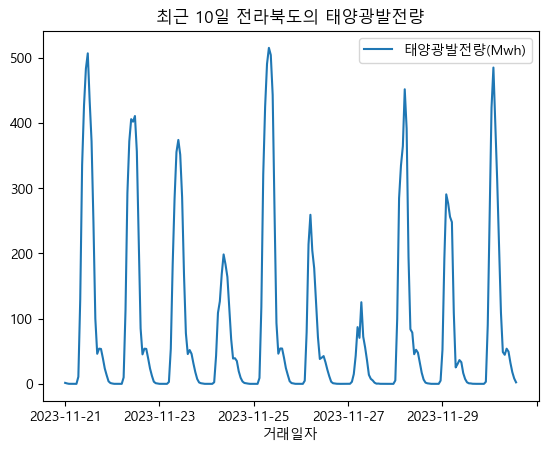

In [112]:
n = 10
name = land[2]
df[df['지역명'] == name][-24*n:].plot(x="거래일자",y="태양광발전량(Mwh)")
plt.title("최근 {}일 {}의 태양광발전량".format(n,name))
plt.show()

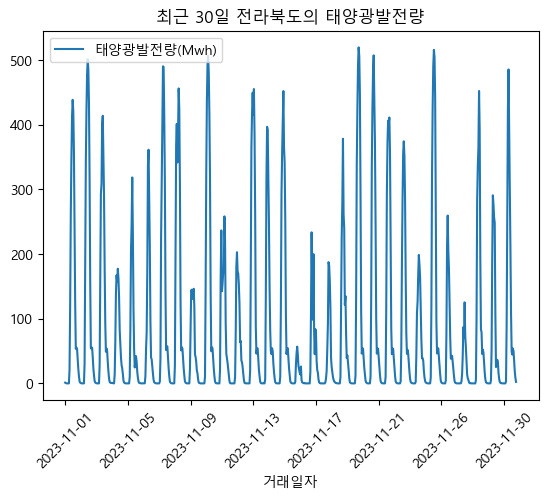

In [121]:
n = 30
name = land[2]
df[df['지역명'] == name][-24*n:].plot(x="거래일자",y="태양광발전량(Mwh)")
plt.title("최근 {}일 {}의 태양광발전량".format(n,name))
plt.xticks(rotation = 45)
plt.show()

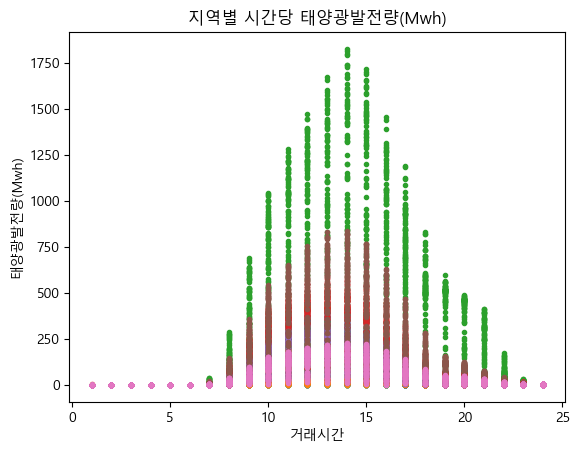

In [122]:
grouped = df.groupby("지역명")

for name, group in grouped:
    plt.scatter(group["거래시간"], group["태양광발전량(Mwh)"], label=name, marker='.')

plt.xlabel('거래시간')
plt.ylabel('태양광발전량(Mwh)')

plt.title('지역별 시간당 태양광발전량(Mwh)')
#plt.legend()
plt.show()

---
##  풍력발전량 그래프

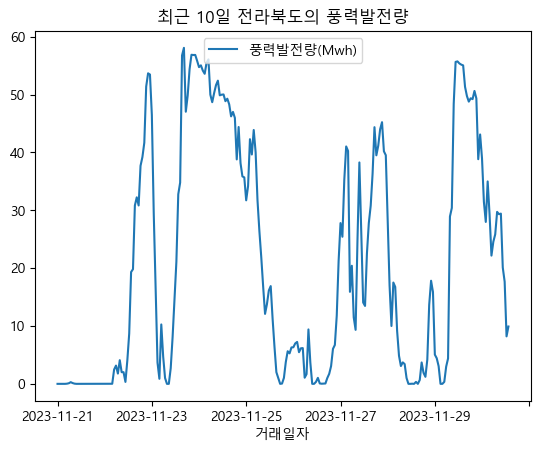

In [125]:
n = 10
name = land[2]
df[df['지역명'] == name][-24*n:].plot(x="거래일자",y="풍력발전량(Mwh)")
plt.title("최근 {}일 {}의 풍력발전량".format(n,name))
plt.show()

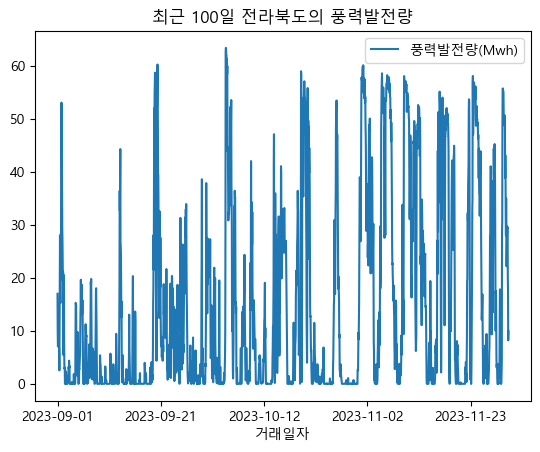

In [126]:
n = 100
name = land[2]
df[df['지역명'] == name][-24*n:].plot(x="거래일자",y="풍력발전량(Mwh)")
plt.title("최근 {}일 {}의 풍력발전량".format(n,name))
plt.show()

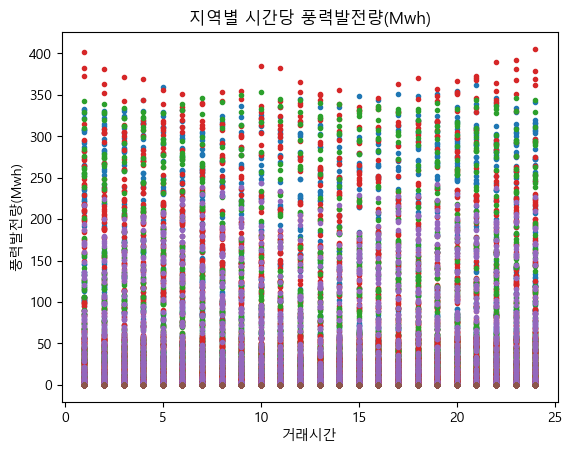

In [128]:
grouped = df.groupby("지역명")

for name, group in grouped:
    plt.scatter(group["거래시간"], group["풍력발전량(Mwh)"], label=name, marker='.')

plt.xlabel('거래시간')
plt.ylabel('풍력발전량(Mwh)')

plt.title('지역별 시간당 풍력발전량(Mwh)')
#plt.legend()
plt.show()